## KNN implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 (Not Standrdized) (Raw Code)

NB : This is KNN Raw code that I wrote before and tried implementing on this dataset. But the dataset is so much huge (almost containing 21000 rows) that even in 2 hours , it couldn't give the output. So I had to stop the cell running.

The only way it may work is by reducing the number of rows.

## Library

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math 

## Data Set

## reading .mat file

In [135]:
from scipy.io import loadmat

In [136]:
loadmat('Indian_pines.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:20:38 2011',
 '__version__': '1.0',
 '__globals__': [],
 'indian_pines': array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
         [2580, 4266, 4502, ..., 1029, 1020, 1000],
         [3687, 4266, 4421, ..., 1030, 1016, 1009],
         ...,
         [2570, 3890, 4320, ..., 1021, 1015, 1025],
         [3170, 4130, 4320, ..., 1024, 1020, 1011],
         [3172, 3890, 4316, ..., 1034, 1016, 1015]],
 
        [[2576, 4388, 4334, ..., 1030, 1006, 1015],
         [2747, 4264, 4592, ..., 1039, 1015, 1020],
         [2750, 4268, 4423, ..., 1026, 1015, 1020],
         ...,
         [3859, 4512, 4605, ..., 1035, 1015,  996],
         [3686, 4264, 4690, ..., 1012, 1020, 1014],
         [2744, 4268, 4597, ..., 1019, 1016, 1010]],
 
        [[2744, 4146, 4416, ..., 1029, 1025, 1010],
         [2576, 4389, 4416, ..., 1021, 1011, 1000],
         [2744, 4273, 4420, ..., 1033, 1010, 1014],
         ...,
         [2570, 4

In [137]:
loadmat('Indian_pines.mat')['indian_pines'].shape

(145, 145, 220)

In [138]:
mat = loadmat('Indian_pines.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:20:38 2011',
 '__version__': '1.0',
 '__globals__': [],
 'indian_pines': array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
         [2580, 4266, 4502, ..., 1029, 1020, 1000],
         [3687, 4266, 4421, ..., 1030, 1016, 1009],
         ...,
         [2570, 3890, 4320, ..., 1021, 1015, 1025],
         [3170, 4130, 4320, ..., 1024, 1020, 1011],
         [3172, 3890, 4316, ..., 1034, 1016, 1015]],
 
        [[2576, 4388, 4334, ..., 1030, 1006, 1015],
         [2747, 4264, 4592, ..., 1039, 1015, 1020],
         [2750, 4268, 4423, ..., 1026, 1015, 1020],
         ...,
         [3859, 4512, 4605, ..., 1035, 1015,  996],
         [3686, 4264, 4690, ..., 1012, 1020, 1014],
         [2744, 4268, 4597, ..., 1019, 1016, 1010]],
 
        [[2744, 4146, 4416, ..., 1029, 1025, 1010],
         [2576, 4389, 4416, ..., 1021, 1011, 1000],
         [2744, 4273, 4420, ..., 1033, 1010, 1014],
         ...,
         [2570, 4

In [139]:
print(type(mat))

<class 'dict'>


In [140]:
data = mat['indian_pines']
data

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [2580, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [2570, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[2576, 4388, 4334, ..., 1030, 1006, 1015],
        [2747, 4264, 4592, ..., 1039, 1015, 1020],
        [2750, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [2744, 4268, 4597, ..., 1019, 1016, 1010]],

       [[2744, 4146, 4416, ..., 1029, 1025, 1010],
        [2576, 4389, 4416, ..., 1021, 1011, 1000],
        [2744, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [2570, 4266, 4509, ..., 1025, 1010, 1005],
        [2576, 4262, 4496, ..., 1029, 1020, 1005],
        [2742, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

In [141]:
data.shape

(145, 145, 220)

In [142]:
data[0]

array([[3172, 4142, 4506, ..., 1020, 1020, 1005],
       [2580, 4266, 4502, ..., 1029, 1020, 1000],
       [3687, 4266, 4421, ..., 1030, 1016, 1009],
       ...,
       [2570, 3890, 4320, ..., 1021, 1015, 1025],
       [3170, 4130, 4320, ..., 1024, 1020, 1011],
       [3172, 3890, 4316, ..., 1034, 1016, 1015]], dtype=uint16)

In [143]:
data[0][0]

array([3172, 4142, 4506, 4279, 4782, 5048, 5213, 5106, 5053, 4750, 4816,
       4769, 4610, 4805, 4828, 4861, 4767, 4624, 4549, 4463, 4462, 4446,
       4445, 4336, 4381, 4319, 4207, 4305, 4311, 3991, 4168, 3942, 4061,
       4362, 4318, 4252, 4869, 5284, 5055, 3591, 5175, 5217, 5058, 4969,
       4721, 4291, 4555, 4886, 4868, 4806, 4783, 4811, 4709, 3903, 3795,
       3715, 2591, 2130, 2269, 2480, 3145, 3626, 4060, 4296, 4211, 4225,
       4157, 4133, 4082, 4048, 3935, 3843, 3784, 3642, 3271, 2707, 1707,
       1564, 1838, 1719, 2229, 2764, 2919, 2873, 2977, 2913, 3034, 3051,
       3124, 3101, 3033, 2713, 2740, 2947, 2706, 2834, 2856, 2683, 2400,
       2229, 1822, 1542, 1097, 1029, 1020, 1026, 1009, 1011, 1047, 1069,
       1100, 1122, 1259, 1365, 1261, 1374, 1630, 1851, 2028, 2130, 2170,
       2205, 2214, 2204, 2100, 2106, 2146, 2089, 2078, 2134, 2127, 2074,
       2057, 2045, 2003, 1999, 1959, 1924, 1883, 1843, 1781, 1716, 1698,
       1645, 1540, 1410, 1294, 1131, 1044, 1029, 10

In [144]:
# this is value of (0,0) pixel of band 0
data[0][0][0]

3172

In [145]:
# this is value of (0,0) pixel of band 1
data[0][0][1]


4142

In [146]:
# this is value of (0,0) pixel of band 199 (last band)
data[0][0][199]


1241

In [147]:
ground_truth = loadmat('indian_pines_gt.mat')

In [148]:
ground_truth

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:25:41 2011',
 '__version__': '1.0',
 '__globals__': [],
 'indian_pines_gt': array([[3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [149]:
ground_truth_data = ground_truth['indian_pines_gt']
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Preparing Data by making the band number as features and pixel number as rows

In [150]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x][y][z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  2580,
  3687,
  2749,
  2746,
  2575,
  2575,
  2575,
  2578,
  2754,
  3858,
  2746,
  2575,
  2575,
  2575,
  2575,
  2575,
  2575,
  2578,
  2746,
  2570,
  3172,
  2575,
  2570,
  3167,
  3004,
  2746,
  2570,
  3170,
  3170,
  3170,
  3167,
  3002,
  2570,
  2996,
  3004,
  2746,
  2575,
  2578,
  2749,
  2749,
  2746,
  2580,
  3687,
  2746,
  2578,
  2746,
  2575,
  2578,
  2746,
  2575,
  2575,
  2575,
  2580,
  3687,
  2743,
  3172,
  2578,
  2746,
  2578,
  2751,
  3690,
  3690,
  3690,
  3693,
  3858,
  2749,
  2749,
  2743,
  3170,
  3175,
  2746,
  2575,
  2575,
  2570,
  3172,
  2570,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  2570,
  3172,
  2570,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  2570,
  3178,
  3690,
  3687,
  2749,
  2749,
  2746,
  2575,
  2578,
  2743,
  3175,
  2746,
  2575,
  2575,
  2575,
  2570,
  3172,
  2575,
  2578,
  2743,
  3172,
  2570,
  3170,
  3178,
  3685,
  2575,
  2570,
  3175,
  2749

In [151]:
dictionary['band_1']

[3172,
 2580,
 3687,
 2749,
 2746,
 2575,
 2575,
 2575,
 2578,
 2754,
 3858,
 2746,
 2575,
 2575,
 2575,
 2575,
 2575,
 2575,
 2578,
 2746,
 2570,
 3172,
 2575,
 2570,
 3167,
 3004,
 2746,
 2570,
 3170,
 3170,
 3170,
 3167,
 3002,
 2570,
 2996,
 3004,
 2746,
 2575,
 2578,
 2749,
 2749,
 2746,
 2580,
 3687,
 2746,
 2578,
 2746,
 2575,
 2578,
 2746,
 2575,
 2575,
 2575,
 2580,
 3687,
 2743,
 3172,
 2578,
 2746,
 2578,
 2751,
 3690,
 3690,
 3690,
 3693,
 3858,
 2749,
 2749,
 2743,
 3170,
 3175,
 2746,
 2575,
 2575,
 2570,
 3172,
 2570,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 2570,
 3172,
 2570,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 2570,
 3178,
 3690,
 3687,
 2749,
 2749,
 2746,
 2575,
 2578,
 2743,
 3175,
 2746,
 2575,
 2575,
 2575,
 2570,
 3172,
 2575,
 2578,
 2743,
 3172,
 2570,
 3170,
 3178,
 3685,
 2575,
 2570,
 3175,
 2749,
 2749,
 2749,
 2749,
 2751,
 3690,
 3693,
 3858,
 2751,
 3687,
 2754,
 3861,
 3687,
 2749,
 2746,
 2578,
 2746,
 2570,
 3002,
 2570,

In [152]:
np.array(dictionary['band_1'])

array([3172, 2580, 3687, ..., 3153, 3155, 3323], dtype=uint16)

In [153]:
np.array(dictionary['band_1']).shape

(21025,)

In [154]:
np.array(dictionary['band_1']).reshape(145,145)

array([[3172, 2580, 3687, ..., 2570, 3170, 3172],
       [2576, 2747, 2750, ..., 3859, 3686, 2744],
       [2744, 2576, 2744, ..., 2570, 2576, 2742],
       ...,
       [3324, 2983, 2988, ..., 2564, 2730, 3156],
       [3161, 2727, 2988, ..., 3156, 3159, 2561],
       [2979, 2977, 2814, ..., 3153, 3155, 3323]], dtype=uint16)

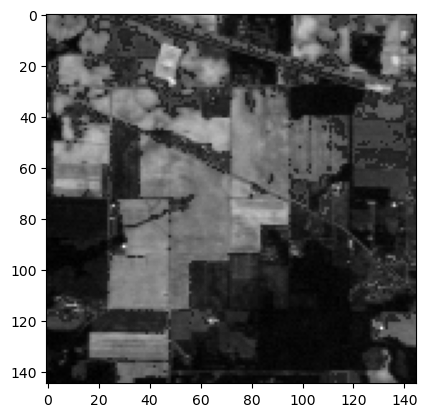

In [155]:
plt.imshow(np.array(dictionary['band_32']).reshape(145,145),cmap='gray')
plt.show()

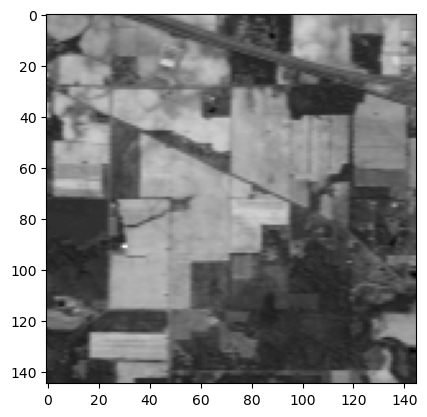

In [156]:
plt.imshow(np.array(dictionary['band_122']).reshape(145,145),cmap='gray')
plt.show()

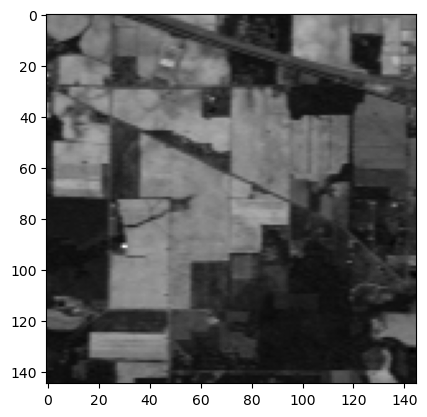

In [157]:
plt.imshow(np.array(dictionary['band_183']).reshape(145,145),cmap='gray')
plt.show()

## Preparing ground truth data as target data

In [158]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [159]:
ground_truth_data.shape

(145, 145)

In [160]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 830,
 0: 10776,
 15: 386,
 11: 2455,
 12: 593,
 5: 483,
 10: 972,
 14: 1265,
 16: 93,
 2: 1428,
 4: 237,
 8: 478,
 6: 730,
 9: 20,
 1: 46,
 7: 28,
 13: 205}

So there are total 16 classes in this ground truth data

In [161]:
ground_truth_data.reshape(21025,1)

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [162]:
target = ground_truth_data.reshape(21025,1)
target

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [163]:
print(target.shape)
print(target.ndim)

(21025, 1)
2


but still, 'target' remains as 2D since it's shape is (21025,1). So we need 'target' to be 1D

In [164]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=uint8)

In [165]:
print(target.shape)
print(target.ndim)

(21025,)
1


In [166]:
df = pd.DataFrame(dictionary)
df

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        2580    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        2749    4258    4603    4493    4958    5234    5417    5355    5349   
4        2746    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    2561    3987    4011    4023    4201    4377    4418    4248    4180   
21021    2726    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4106    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_211  band_212  band_213  band_214  band_215  \
0         4750  ...      1094      1090      1112      1090      1062   
1         5065  ...      1108      1104      1117      1091      1079   
2         5132  ...      1111      1114      1114      1100      1065   
3         5096  ...      1122      1108      1109      1109      1071   
4         4834  ...      1110      1107      1112      1094      1072   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1013      1012      1018      1015      1011   
21021     3900  ...      1012      1014      1012      1024       998   
21022     3878  ...      1016      1015      1016      1021      1008   
21023     3933  ...      1005      1011      1008      1012      1014   
21024     3866  ...      1018      1014      1007      1015      1002   

       band_216  band_217  band_218  band_219  band_220  
0          1069      1057      1020      1020      1005  
1          1085      1064      1029      1020      1000  
2          1092      1061      1030      1016      1009  
3          1088      1060      1030      1006      1005  
4          1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...  
21020      1001      1000      1009      1008      1009  
21021      1010      1006      1000      1000      1004  
21022      1019      1003      1008      1000      1009  
21023      1007      1011      1005      1003      1004  
21024      1010      1007      1004      1000      1000  

[21025 rows x 220 columns]

In [167]:
df['target'] = target

In [168]:
df 

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        2580    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        2749    4258    4603    4493    4958    5234    5417    5355    5349   
4        2746    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    2561    3987    4011    4023    4201    4377    4418    4248    4180   
21021    2726    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4106    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0         4750  ...      1090      1112      1090      1062      1069   
1         5065  ...      1104      1117      1091      1079      1085   
2         5132  ...      1114      1114      1100      1065      1092   
3         5096  ...      1108      1109      1109      1071      1088   
4         4834  ...      1107      1112      1094      1072      1087   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1012      1018      1015      1011      1001   
21021     3900  ...      1014      1012      1024       998      1010   
21022     3878  ...      1015      1016      1021      1008      1019   
21023     3933  ...      1011      1008      1012      1014      1007   
21024     3866  ...      1014      1007      1015      1002      1010   

       band_217  band_218  band_219  band_220  target  
0          1057      1020      1020      1005       3  
1          1064      1029      1020      1000       3  
2          1061      1030      1016      1009       3  
3          1060      1030      1006      1005       3  
4          1052      1034      1019      1019       3  
...         ...       ...       ...       ...     ...  
21020      1000      1009      1008      1009       0  
21021      1006      1000      1000      1004       0  
21022      1003      1008      1000      1009       0  
21023      1011      1005      1003      1004       0  
21024      1007      1004      1000      1000       0  

[21025 rows x 221 columns]

In [169]:
df.columns

Index(['band_1', 'band_2', 'band_3', 'band_4', 'band_5', 'band_6', 'band_7',
       'band_8', 'band_9', 'band_10',
       ...
       'band_212', 'band_213', 'band_214', 'band_215', 'band_216', 'band_217',
       'band_218', 'band_219', 'band_220', 'target'],
      dtype='object', length=221)

In [170]:
n = len(df.columns)
n

221

In [171]:
df[df.columns[n-1]].value_counts()

0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: target, dtype: int64

In [172]:
df[df.columns[n-1]].value_counts().index

UInt64Index([0, 11, 2, 14, 10, 3, 6, 12, 5, 8, 15, 4, 13, 16, 1, 7, 9], dtype='uint64')

In [173]:
df[df.columns[n-1]].nunique()

17

In [174]:
# custom_palette = sns.color_palette("Set1",10)
# sns.palplot(custom_palette)

https://www.codecademy.com/article/seaborn-design-ii

In [175]:
# custom_palette = sns.color_palette("Set1", df[df.columns[2]].nunique()+1)
# color_dict = dict()
# markers_dict = dict()
# j = 0

# for i in df[df.columns[2]].value_counts().index:
#     color_dict[i] = custom_palette[j]
#     markers_dict[i] = 'o'
#     j = j + 1

# color_dict['Test Point'] = custom_palette[2]
# markers_dict['Test Point'] = 'X'

# # print(color_dict)
# # print(markers_dict)

# sns.scatterplot(x = df[df.columns[0]],y = df[df.columns[1]],hue=df[df.columns[2]],palette=color_dict,style=df[df.columns[2]],markers=markers_dict)
# plt.title('Full Data Points')
# plt.legend(loc=(1.05,0.75))

## Determing the value of K

In [176]:
len(df)

21025

In [177]:
k = math.floor(math.sqrt(len(df)))

if k%2==0 :
    k = k + 1

print(k)

145


## Train Test split

In [178]:
train_percentage = 70
test_percentage = 100 - train_percentage

print('Train Percentage :',train_percentage)
print('Test Percentage :',test_percentage)

Train Percentage : 70
Test Percentage : 30


In [179]:
no_of_train_data = math.ceil((train_percentage * len(df)) / 100)
print('No of train data :',no_of_train_data)

no_of_test_data = len(df) - no_of_train_data
print('No of test data',no_of_test_data)

No of train data : 14718
No of test data 6307


In [180]:
df.head(no_of_train_data)

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        2580    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        2749    4258    4603    4493    4958    5234    5417    5355    5349   
4        2746    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
14713    3183    3984    4026    4031    4286    4475    4565    4357    4265   
14714    2585    3980    4026    3960    4338    4382    4560    4420    4326   
14715    2580    3860    4026    3951    4281    4427    4502    4290    4237   
14716    3015    3980    4030    3817    4281    4387    4388    4239    4157   
14717    2754    3856    4115    3969    4291    4495    4538    4442    4360   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0         4750  ...      1090      1112      1090      1062      1069   
1         5065  ...      1104      1117      1091      1079      1085   
2         5132  ...      1114      1114      1100      1065      1092   
3         5096  ...      1108      1109      1109      1071      1088   
4         4834  ...      1107      1112      1094      1072      1087   
...        ...  ...       ...       ...       ...       ...       ...   
14713     4103  ...      1042      1032      1031      1008      1020   
14714     4052  ...      1050      1042      1029      1022      1023   
14715     3951  ...      1033      1024      1034      1024      1020   
14716     3963  ...      1029      1021      1026      1020      1019   
14717     4054  ...      1036      1040      1033      1016      1023   

       band_217  band_218  band_219  band_220  target  
0          1057      1020      1020      1005       3  
1          1064      1029      1020      1000       3  
2          1061      1030      1016      1009       3  
3          1060      1030      1006      1005       3  
4          1052      1034      1019      1019       3  
...         ...       ...       ...       ...     ...  
14713      1025      1005      1014      1000       6  
14714      1009      1008      1000      1004       6  
14715      1020      1013      1000      1004       6  
14716      1017      1000      1004      1000       0  
14717      1021      1008      1004      1009       0  

[14718 rows x 221 columns]

In [181]:
df_train = df.head(no_of_train_data)
df_train

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        2580    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        2749    4258    4603    4493    4958    5234    5417    5355    5349   
4        2746    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
14713    3183    3984    4026    4031    4286    4475    4565    4357    4265   
14714    2585    3980    4026    3960    4338    4382    4560    4420    4326   
14715    2580    3860    4026    3951    4281    4427    4502    4290    4237   
14716    3015    3980    4030    3817    4281    4387    4388    4239    4157   
14717    2754    3856    4115    3969    4291    4495    4538    4442    4360   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0         4750  ...      1090      1112      1090      1062      1069   
1         5065  ...      1104      1117      1091      1079      1085   
2         5132  ...      1114      1114      1100      1065      1092   
3         5096  ...      1108      1109      1109      1071      1088   
4         4834  ...      1107      1112      1094      1072      1087   
...        ...  ...       ...       ...       ...       ...       ...   
14713     4103  ...      1042      1032      1031      1008      1020   
14714     4052  ...      1050      1042      1029      1022      1023   
14715     3951  ...      1033      1024      1034      1024      1020   
14716     3963  ...      1029      1021      1026      1020      1019   
14717     4054  ...      1036      1040      1033      1016      1023   

       band_217  band_218  band_219  band_220  target  
0          1057      1020      1020      1005       3  
1          1064      1029      1020      1000       3  
2          1061      1030      1016      1009       3  
3          1060      1030      1006      1005       3  
4          1052      1034      1019      1019       3  
...         ...       ...       ...       ...     ...  
14713      1025      1005      1014      1000       6  
14714      1009      1008      1000      1004       6  
14715      1020      1013      1000      1004       6  
14716      1017      1000      1004      1000       0  
14717      1021      1008      1004      1009       0  

[14718 rows x 221 columns]

In [182]:
df.tail(no_of_test_data)

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
14718    3180    3864    4030    4103    4405    4593    4720    4492    4504   
14719    3177    4111    4119    3964    4400    4593    4780    4565    4498   
14720    3012    4111    4123    4040    4357    4598    4591    4526    4468   
14721    2583    4107    4212    4107    4515    4647    4796    4542    4504   
14722    3185    3984    4208    4045    4348    4656    4715    4655    4521   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    2561    3987    4011    4023    4201    4377    4418    4248    4180   
21021    2726    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4106    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
14718     4206  ...      1057      1063      1054      1040      1041   
14719     4289  ...      1057      1067      1034      1031      1039   
14720     4194  ...      1064      1047      1034      1033      1042   
14721     4234  ...      1050      1063      1050      1038      1051   
14722     4268  ...      1051      1063      1049      1039      1040   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1012      1018      1015      1011      1001   
21021     3900  ...      1014      1012      1024       998      1010   
21022     3878  ...      1015      1016      1021      1008      1019   
21023     3933  ...      1011      1008      1012      1014      1007   
21024     3866  ...      1014      1007      1015      1002      1010   

       band_217  band_218  band_219  band_220  target  
14718      1013      1013      1009      1010       6  
14719      1029      1013      1009      1014       6  
14720      1031      1009      1009      1005       6  
14721      1048      1013      1018      1009       6  
14722      1033      1005      1005      1010       6  
...         ...       ...       ...       ...     ...  
21020      1000      1009      1008      1009       0  
21021      1006      1000      1000      1004       0  
21022      1003      1008      1000      1009       0  
21023      1011      1005      1003      1004       0  
21024      1007      1004      1000      1000       0  

[6307 rows x 221 columns]

In [183]:
df_test = df.tail(no_of_test_data)
df_test

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
14718    3180    3864    4030    4103    4405    4593    4720    4492    4504   
14719    3177    4111    4119    3964    4400    4593    4780    4565    4498   
14720    3012    4111    4123    4040    4357    4598    4591    4526    4468   
14721    2583    4107    4212    4107    4515    4647    4796    4542    4504   
14722    3185    3984    4208    4045    4348    4656    4715    4655    4521   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    2561    3987    4011    4023    4201    4377    4418    4248    4180   
21021    2726    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4106    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
14718     4206  ...      1057      1063      1054      1040      1041   
14719     4289  ...      1057      1067      1034      1031      1039   
14720     4194  ...      1064      1047      1034      1033      1042   
14721     4234  ...      1050      1063      1050      1038      1051   
14722     4268  ...      1051      1063      1049      1039      1040   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1012      1018      1015      1011      1001   
21021     3900  ...      1014      1012      1024       998      1010   
21022     3878  ...      1015      1016      1021      1008      1019   
21023     3933  ...      1011      1008      1012      1014      1007   
21024     3866  ...      1014      1007      1015      1002      1010   

       band_217  band_218  band_219  band_220  target  
14718      1013      1013      1009      1010       6  
14719      1029      1013      1009      1014       6  
14720      1031      1009      1009      1005       6  
14721      1048      1013      1018      1009       6  
14722      1033      1005      1005      1010       6  
...         ...       ...       ...       ...     ...  
21020      1000      1009      1008      1009       0  
21021      1006      1000      1000      1004       0  
21022      1003      1008      1000      1009       0  
21023      1011      1005      1003      1004       0  
21024      1007      1004      1000      1000       0  

[6307 rows x 221 columns]

In [184]:
df_test = df_test.reset_index()
df_test

index  band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  \
0     14718    3180    3864    4030    4103    4405    4593    4720    4492   
1     14719    3177    4111    4119    3964    4400    4593    4780    4565   
2     14720    3012    4111    4123    4040    4357    4598    4591    4526   
3     14721    2583    4107    4212    4107    4515    4647    4796    4542   
4     14722    3185    3984    4208    4045    4348    4656    4715    4655   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
6302  21020    2561    3987    4011    4023    4201    4377    4418    4248   
6303  21021    2726    4104    4024    3880    4210    4377    4413    4174   
6304  21022    3153    3864    4282    3889    4310    4372    4375    4208   
6305  21023    3155    4104    4106    4027    4139    4318    4413    4174   
6306  21024    3323    3860    4197    3952    4148    4279    4375    4225   

      band_9  ...  band_212  band_213  band_214  band_215  band_216  band_217  \
0       4504  ...      1057      1063      1054      1040      1041      1013   
1       4498  ...      1057      1067      1034      1031      1039      1029   
2       4468  ...      1064      1047      1034      1033      1042      1031   
3       4504  ...      1050      1063      1050      1038      1051      1048   
4       4521  ...      1051      1063      1049      1039      1040      1033   
...      ...  ...       ...       ...       ...       ...       ...       ...   
6302    4180  ...      1012      1018      1015      1011      1001      1000   
6303    4229  ...      1014      1012      1024       998      1010      1006   
6304    4096  ...      1015      1016      1021      1008      1019      1003   
6305    4140  ...      1011      1008      1012      1014      1007      1011   
6306    3988  ...      1014      1007      1015      1002      1010      1007   

      band_218  band_219  band_220  target  
0         1013      1009      1010       6  
1         1013      1009      1014       6  
2         1009      1009      1005       6  
3         1013      1018      1009       6  
4         1005      1005      1010       6  
...        ...       ...       ...     ...  
6302      1009      1008      1009       0  
6303      1000      1000      1004       0  
6304      1008      1000      1009       0  
6305      1005      1003      1004       0  
6306      1004      1000      1000       0  

[6307 rows x 222 columns]

In [185]:
df_test = df_test.drop('index',axis=1)
df_test

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0       3180    3864    4030    4103    4405    4593    4720    4492    4504   
1       3177    4111    4119    3964    4400    4593    4780    4565    4498   
2       3012    4111    4123    4040    4357    4598    4591    4526    4468   
3       2583    4107    4212    4107    4515    4647    4796    4542    4504   
4       3185    3984    4208    4045    4348    4656    4715    4655    4521   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
6302    2561    3987    4011    4023    4201    4377    4418    4248    4180   
6303    2726    4104    4024    3880    4210    4377    4413    4174    4229   
6304    3153    3864    4282    3889    4310    4372    4375    4208    4096   
6305    3155    4104    4106    4027    4139    4318    4413    4174    4140   
6306    3323    3860    4197    3952    4148    4279    4375    4225    3988   

      band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0        4206  ...      1057      1063      1054      1040      1041   
1        4289  ...      1057      1067      1034      1031      1039   
2        4194  ...      1064      1047      1034      1033      1042   
3        4234  ...      1050      1063      1050      1038      1051   
4        4268  ...      1051      1063      1049      1039      1040   
...       ...  ...       ...       ...       ...       ...       ...   
6302     3838  ...      1012      1018      1015      1011      1001   
6303     3900  ...      1014      1012      1024       998      1010   
6304     3878  ...      1015      1016      1021      1008      1019   
6305     3933  ...      1011      1008      1012      1014      1007   
6306     3866  ...      1014      1007      1015      1002      1010   

      band_217  band_218  band_219  band_220  target  
0         1013      1013      1009      1010       6  
1         1029      1013      1009      1014       6  
2         1031      1009      1009      1005       6  
3         1048      1013      1018      1009       6  
4         1033      1005      1005      1010       6  
...        ...       ...       ...       ...     ...  
6302      1000      1009      1008      1009       0  
6303      1006      1000      1000      1004       0  
6304      1003      1008      1000      1009       0  
6305      1011      1005      1003      1004       0  
6306      1007      1004      1000      1000       0  

[6307 rows x 221 columns]

In [186]:
# df_temp = df.copy()
# df_temp

In [187]:
# df_temp['Cancer Present'][no_of_train_data:] = ['Test Point'] * no_of_test_data
# df_temp

In [188]:
# sns.scatterplot(x = df_temp[df_temp.columns[0]],y = df_temp[df_temp.columns[1]],hue=df_temp[df_temp.columns[2]],palette=color_dict,style=df_temp[df_temp.columns[2]],markers=markers_dict)
# plt.title('Train Data Points and Test Data Points')
# plt.legend(loc=(1.05,0.75))

# # hue without palette : sns will provide default color for each group or class in df_temp['Cancer Present]
# # huw with palette : sns will provide color we want for each group or class in df_temp['Cancer Present]
# # style without markers : sns will provide default shape for each group or class in df_temp['Cancer Present]
# # style with markers : sns will provide shape we want for each group or class in df_temp['Cancer Present]


## Calculating Euclean Distance from Test point to Train point , sorting it ascending order and then finding the nearest neighbor

In [189]:
df_train

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        2580    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        2749    4258    4603    4493    4958    5234    5417    5355    5349   
4        2746    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
14713    3183    3984    4026    4031    4286    4475    4565    4357    4265   
14714    2585    3980    4026    3960    4338    4382    4560    4420    4326   
14715    2580    3860    4026    3951    4281    4427    4502    4290    4237   
14716    3015    3980    4030    3817    4281    4387    4388    4239    4157   
14717    2754    3856    4115    3969    4291    4495    4538    4442    4360   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0         4750  ...      1090      1112      1090      1062      1069   
1         5065  ...      1104      1117      1091      1079      1085   
2         5132  ...      1114      1114      1100      1065      1092   
3         5096  ...      1108      1109      1109      1071      1088   
4         4834  ...      1107      1112      1094      1072      1087   
...        ...  ...       ...       ...       ...       ...       ...   
14713     4103  ...      1042      1032      1031      1008      1020   
14714     4052  ...      1050      1042      1029      1022      1023   
14715     3951  ...      1033      1024      1034      1024      1020   
14716     3963  ...      1029      1021      1026      1020      1019   
14717     4054  ...      1036      1040      1033      1016      1023   

       band_217  band_218  band_219  band_220  target  
0          1057      1020      1020      1005       3  
1          1064      1029      1020      1000       3  
2          1061      1030      1016      1009       3  
3          1060      1030      1006      1005       3  
4          1052      1034      1019      1019       3  
...         ...       ...       ...       ...     ...  
14713      1025      1005      1014      1000       6  
14714      1009      1008      1000      1004       6  
14715      1020      1013      1000      1004       6  
14716      1017      1000      1004      1000       0  
14717      1021      1008      1004      1009       0  

[14718 rows x 221 columns]

In [190]:
df_test

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0       3180    3864    4030    4103    4405    4593    4720    4492    4504   
1       3177    4111    4119    3964    4400    4593    4780    4565    4498   
2       3012    4111    4123    4040    4357    4598    4591    4526    4468   
3       2583    4107    4212    4107    4515    4647    4796    4542    4504   
4       3185    3984    4208    4045    4348    4656    4715    4655    4521   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
6302    2561    3987    4011    4023    4201    4377    4418    4248    4180   
6303    2726    4104    4024    3880    4210    4377    4413    4174    4229   
6304    3153    3864    4282    3889    4310    4372    4375    4208    4096   
6305    3155    4104    4106    4027    4139    4318    4413    4174    4140   
6306    3323    3860    4197    3952    4148    4279    4375    4225    3988   

      band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0        4206  ...      1057      1063      1054      1040      1041   
1        4289  ...      1057      1067      1034      1031      1039   
2        4194  ...      1064      1047      1034      1033      1042   
3        4234  ...      1050      1063      1050      1038      1051   
4        4268  ...      1051      1063      1049      1039      1040   
...       ...  ...       ...       ...       ...       ...       ...   
6302     3838  ...      1012      1018      1015      1011      1001   
6303     3900  ...      1014      1012      1024       998      1010   
6304     3878  ...      1015      1016      1021      1008      1019   
6305     3933  ...      1011      1008      1012      1014      1007   
6306     3866  ...      1014      1007      1015      1002      1010   

      band_217  band_218  band_219  band_220  target  
0         1013      1013      1009      1010       6  
1         1029      1013      1009      1014       6  
2         1031      1009      1009      1005       6  
3         1048      1013      1018      1009       6  
4         1033      1005      1005      1010       6  
...        ...       ...       ...       ...     ...  
6302      1000      1009      1008      1009       0  
6303      1006      1000      1000      1004       0  
6304      1003      1008      1000      1009       0  
6305      1011      1005      1003      1004       0  
6306      1007      1004      1000      1000       0  

[6307 rows x 221 columns]

In [191]:
df_test.iloc[0]

band_1      3180
band_2      3864
band_3      4030
band_4      4103
band_5      4405
            ... 
band_217    1013
band_218    1013
band_219    1009
band_220    1010
target         6
Name: 0, Length: 221, dtype: int16

In [192]:
df_train.iloc[0][0]

3172

In [193]:
df_train[df.columns[n-1]][0]

3

In [194]:
n

221

In [195]:
df_train.columns

Index(['band_1', 'band_2', 'band_3', 'band_4', 'band_5', 'band_6', 'band_7',
       'band_8', 'band_9', 'band_10',
       ...
       'band_212', 'band_213', 'band_214', 'band_215', 'band_216', 'band_217',
       'band_218', 'band_219', 'band_220', 'target'],
      dtype='object', length=221)

----------------------

#### Testing Part Begins

In [196]:
np.linalg.norm(df_test.iloc[0]-df_train.iloc[1])


8362.703450439936

In [197]:
distance_list = list()
for i in range(1):
    for j in range(10):
        distance = np.linalg.norm(df_test.iloc[i]-df_train.iloc[j])
        distance_list.append((df_train[df_train.columns[n-1]][j],distance))

print(distance_list)

[(3, 5771.444793117231), (3, 8362.703450439936), (3, 9264.70026498429), (3, 8582.723052737983), (3, 6294.344445611473), (3, 5175.205793009588), (3, 5718.03899951723), (3, 5619.279758118472), (3, 5987.001753799643), (3, 5710.077932918254)]


In [198]:
distance_list = list()
total_distance = 0

for i in range(1):
    for j in range(10):
        for c in range(n-1):
            distance = (df_test.iloc[i][c] - df_train.iloc[j][c])**2
            total_distance = total_distance + distance
        total_distance = math.sqrt(total_distance)
        distance_list.append((df_train[df_train.columns[n-1]][j],total_distance))
        total_distance = 0
        
print(distance_list)

[(3, 5771.4440134164), (3, 8362.702912336417), (3, 9264.699779269698), (3, 8582.722528428843), (3, 6294.343730683922), (3, 5175.2049234788765), (3, 5718.038212534086), (3, 5619.278957304042), (3, 5987.001002171288), (3, 5710.077144837887)]


In [199]:
# selecting first k smallest elements from a list

l = [6,7,4,8,3,2,5,1,10,9,1,2]
min_list = list()
min = None
checked = dict()

for i in range(4):
    for j in range(len(l)):
        if j not in checked :
            if min is None :
                min = l[j]
            elif l[j] < min:
                min = l[j]
                index = j
    min_list.append(min)
    checked[index] = 1
    min = None
print(min_list)    

[1, 1, 2, 2]


#### Testing Part Ends

---------------------

In [200]:
class_name_list = list()

# calculating euclidean distance from test data to train data

for i in range(len(df_test)):
    distance_list = list()
    for j in range(len(df_train)):
        distance = np.linalg.norm(df_test.iloc[i][:n-1]-df_train.iloc[j][:n-1])
        distance_list.append((df_train[df_train.columns[n-1]][j],distance))    

    # finding the first k smallest distances without sorting and counting the class

    minimum = None
    checked = dict()
    count = dict()
    min_list = list()

    for ii in range(k):
        for jj in range(len(distance_list)):
            if jj not in checked :
                if minimum is None :
                    minimum = distance_list[jj]
                elif distance_list[jj][1] < minimum[1]:
                    minimum = distance_list[jj]
                    index = jj
        min_list.append(minimum)
        if minimum[0] not in count:
            count[minimum[0]] = 1
        else:
            count[minimum[0]] = count[minimum[0]] + 1
        checked[index] = 1
        minimum = None
    

    # finding out the most nearest class
    
    min = 0
    for ii in count:
        if count[ii] > min:
            class_name = ii
            min = count[ii]
    class_name_list.append(class_name)
    
print(class_name_list)

KeyboardInterrupt: 

In [ ]:
print(len(class_name_list))

22


In [ ]:
# df_temp2 = df.copy()
# df_temp2

In [ ]:
# df_temp2[df_temp2.columns[n-1]][no_of_train_data:] = class_name_list
# df_temp2

In [ ]:
# color_dict

In [ ]:
# sns.scatterplot(x = df_temp2[df_temp2.columns[0]],y = df_temp2[df_temp2.columns[1]],hue=df_temp2[df_temp2.columns[2]],palette=color_dict,style=df_temp2[df_temp2.columns[2]],markers=markers_dict)
# plt.title('Final Data Points')
# plt.legend(loc=(1.05,0.75))

In [ ]:
# plt.figure(figsize=(15,6))

# plt.subplot(1, 2, 1) # row 1, col 2 index 1

# sns.scatterplot(x = df_temp[df_temp.columns[0]],y = df_temp[df_temp.columns[1]],hue=df_temp[df_temp.columns[2]],palette=color_dict,style=df_temp[df_temp.columns[2]],markers=markers_dict)
# plt.title('Train Data Points and Test Data Points')

# # hue without palette : sns will provide default color for each group or class in df_temp['Cancer Present]
# # huw with palette : sns will provide color we want for each group or class in df_temp['Cancer Present]
# # style without markers : sns will provide default shape for each group or class in df_temp['Cancer Present]
# # style with markers : sns will provide shape we want for each group or class in df_temp['Cancer Present]





# plt.subplot(1, 2, 2) # index 2


# sns.scatterplot(x = df_temp2[df_temp2.columns[0]],y = df_temp2[df_temp2.columns[1]],hue=df_temp2[df_temp2.columns[2]],palette=color_dict,style=df_temp2[df_temp2.columns[2]],markers=markers_dict)
# plt.title('Final Data Points')

In [ ]:
right = 0
wrong = 0

for i in range(len(class_name_list)):
    if class_name_list[i] == df_test[df_test.columns[n-1]][i]:
        right = right + 1
    else:
        wrong = wrong + 1

print(right,wrong)

20 2


In [ ]:
accuarcy = (right * 100) / len(class_name_list)
print(accuarcy)

90.9090909090909
